## Modelo de consumos 2016 - 2018

- Sklearn
- Python 3.6
- Spark


> https://mapr.com/blog/predicting-airbnb-listing-prices-scikit-learn-and-apache-spark/
https://www.kdnuggets.com/2016/01/python-data-science-pandas-spark-dataframe-differences.html





In [1]:
#from sklearn import svm, grid_search, datasets
#from spark_sklearn import GridSearchCV 
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.metrics import make_scorer
#from sklearn.model_selection import GridSearchCV
 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import random
import math
%matplotlib inline

In [27]:
file_consumos = "consumosValpoMin.csv"
file_temp = "tempvalp.csv"

In [12]:
df = pd.read_csv(file_consumos , sep=';' ,  encoding='utf-8' , decimal=',') #decimal para leer las comas

In [28]:
df_temp = pd.read_csv(file_temp , sep=';' ,  encoding='utf-8' , decimal=',') #decimal para leer las comas

In [15]:
df.info()

df.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308124 entries, 0 to 308123
Data columns (total 8 columns):
COMUNA            308124 non-null object
PLAN_COMERCIAL    308124 non-null object
CATEGORIA         308124 non-null object
SUBCATEGORIA      308124 non-null object
PRODUCT_ID        308124 non-null int64
AÑO               308124 non-null int64
MES               308124 non-null int64
CONSUMO           308124 non-null float64
dtypes: float64(1), int64(3), object(4)
memory usage: 18.8+ MB


,COMUNA,PLAN_COMERCIAL,CATEGORIA,SUBCATEGORIA,PRODUCT_ID,AÑO,MES,CONSUMO
308119,117 - VALPARAÍSO,65 - AT-4.3,3 - INDUSTRIAL,2 - Fábrica,130680,2018,5,10444.8
308120,117 - VALPARAÍSO,65 - AT-4.3,3 - INDUSTRIAL,2 - Fábrica,130680,2018,4,10447.8
308121,117 - VALPARAÍSO,65 - AT-4.3,3 - INDUSTRIAL,2 - Fábrica,130680,2018,3,11536.9
308122,117 - VALPARAÍSO,65 - AT-4.3,3 - INDUSTRIAL,2 - Fábrica,130680,2018,2,11414.8
308123,117 - VALPARAÍSO,65 - AT-4.3,3 - INDUSTRIAL,2 - Fábrica,130680,2018,1,10716.8


 Cuatro variables categóricas y cuatro numéricas

In [16]:
df.describe() # para variables numéricas 

,PRODUCT_ID,AÑO,MES,CONSUMO
count,308124.000000,308124.000000,308124.000000,308124.000000
mean,115405.777216,2016.969029,6.333853,284.521644
std,11179.629884,0.809647,3.368499,3782.844455
min,100000.000000,2016.000000,1.000000,-1586.200000
25%,102483.000000,2016.000000,3.000000,68.500000
50%,115548.000000,2017.000000,6.000000,123.500000
75%,128000.000000,2018.000000,9.000000,195.300000
max,130680.000000,2018.000000,12.000000,295250.000000


#### Valores ausentes :)


In [17]:
print('NULL VALUES !')
df.isnull().sum()

NULL VALUES !


COMUNA            0
PLAN_COMERCIAL    0
CATEGORIA         0
SUBCATEGORIA      0
PRODUCT_ID        0
AÑO               0
MES               0
CONSUMO           0
dtype: int64

#### Eliminar valores null 

In [19]:
#no es necesario
#slr_df = slr_df.dropna()
#slr_df.isnull().sum()

####  Correlograma

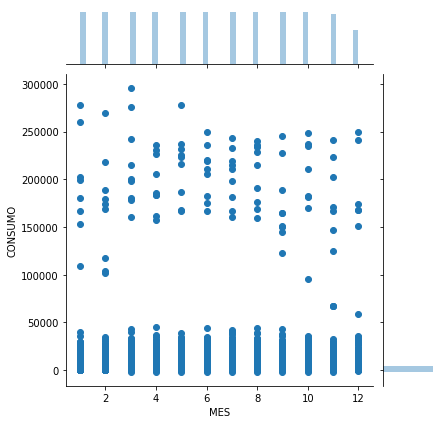

In [24]:
sns.jointplot(data = df, x = 'MES', y ='CONSUMO') 

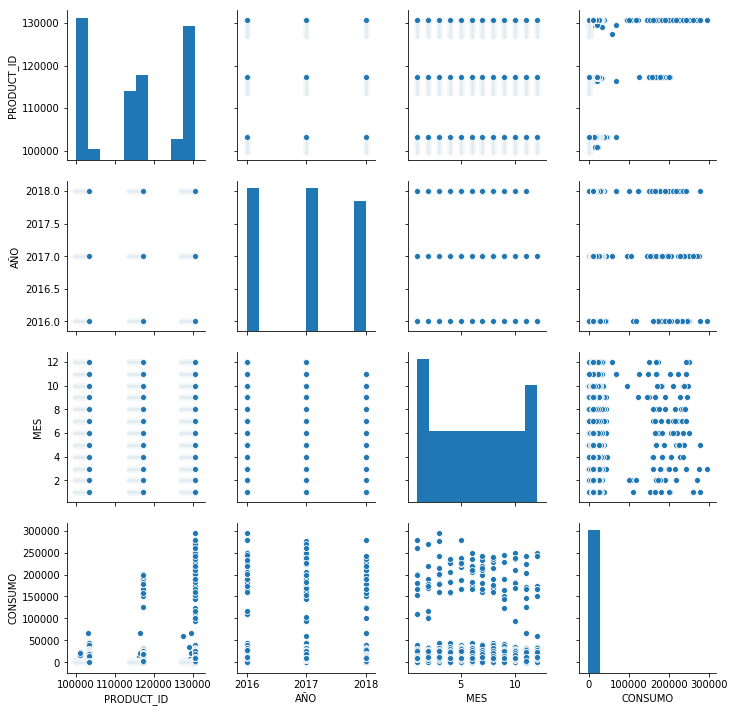

In [26]:
sns.pairplot(df)

In [29]:
df_temp.info()

df_temp.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
year    35 non-null int64
mes     35 non-null int64
max     35 non-null float64
avg     35 non-null float64
min     35 non-null float64
dtypes: float64(3), int64(2)
memory usage: 1.4 KB


,year,mes,max,avg,min
30,2018,7,14.3,9.1,6.2
31,2018,8,15.7,9.9,6.6
32,2018,9,18.7,12.3,8.4
33,2018,10,19.0,12.4,8.2
34,2018,11,23.8,16.0,10.3


In [34]:
df_temp.describe()

,year,mes,max,avg,min
count,35.000000,35.000000,35.000000,35.000000,35.000000
mean,2016.971429,6.342857,19.551429,13.454286,9.697143
std,0.821967,3.420895,3.238951,2.737790,2.262675
min,2016.000000,1.000000,14.300000,9.100000,6.200000
25%,2016.000000,3.500000,17.100000,11.150000,7.700000
50%,2017.000000,6.000000,19.000000,13.000000,9.600000
75%,2018.000000,9.000000,22.500000,15.850000,11.500000
max,2018.000000,12.000000,26.000000,18.700000,13.800000


In [35]:
df_temp.head()

,year,mes,max,avg,min
0,2016,1,23.7,18.0,13.8
1,2016,2,23.5,17.0,12.8
2,2016,3,19.2,14.8,12.3
3,2016,4,18.6,13.7,11.1
4,2016,5,17.2,12.8,10.6


## Unión con temperaturas de valparaiso

In [75]:
data.columns

Index(['COMUNA', 'PLAN_COMERCIAL', 'CATEGORIA', 'SUBCATEGORIA', 'PRODUCT_ID',
       'AÑO', 'MES', 'CONSUMO', 'year', 'mes', 'max', 'avg', 'min'],
      dtype='object')

In [84]:
#data = pd.merge(df, df_temp,  how='left', left_on=['AÑO','MES'], right_on = ['year','mes'])[]
data = pd.merge(df, df_temp,  how='left', left_on=['AÑO','MES'], right_on = ['year','mes'])[['COMUNA', 'PLAN_COMERCIAL', 'CATEGORIA', 'SUBCATEGORIA', 'PRODUCT_ID', 'AÑO', 'MES', 'CONSUMO' , 'max', 'avg', 'min']]
  

In [86]:
data.head()

,COMUNA,PLAN_COMERCIAL,CATEGORIA,SUBCATEGORIA,PRODUCT_ID,AÑO,MES,CONSUMO,max,avg,min
0,117 - VALPARAÍSO,1 - BT-2 PACTADO,6 - MUNICIPAL,1 - ALUMBRADO PÚBLICO,100000,2016,12,3215.0,22.7,16.5,11.8
1,117 - VALPARAÍSO,1 - BT-2 PACTADO,6 - MUNICIPAL,1 - ALUMBRADO PÚBLICO,100000,2016,11,3197.0,22.8,15.8,10.6
2,117 - VALPARAÍSO,1 - BT-2 PACTADO,6 - MUNICIPAL,1 - ALUMBRADO PÚBLICO,100000,2016,10,3658.0,19.6,13.4,9.3
3,117 - VALPARAÍSO,1 - BT-2 PACTADO,6 - MUNICIPAL,1 - ALUMBRADO PÚBLICO,100000,2016,9,3889.0,17.3,11.4,7.9
4,117 - VALPARAÍSO,1 - BT-2 PACTADO,6 - MUNICIPAL,1 - ALUMBRADO PÚBLICO,100000,2016,8,4367.0,17.8,11.3,7.7


In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308124 entries, 0 to 308123
Data columns (total 13 columns):
COMUNA            308124 non-null object
PLAN_COMERCIAL    308124 non-null object
CATEGORIA         308124 non-null object
SUBCATEGORIA      308124 non-null object
PRODUCT_ID        308124 non-null int64
AÑO               308124 non-null int64
MES               308124 non-null int64
CONSUMO           308124 non-null float64
year              308124 non-null int64
mes               308124 non-null int64
max               308124 non-null float64
avg               308124 non-null float64
min               308124 non-null float64
dtypes: float64(4), int64(5), object(4)
memory usage: 32.9+ MB


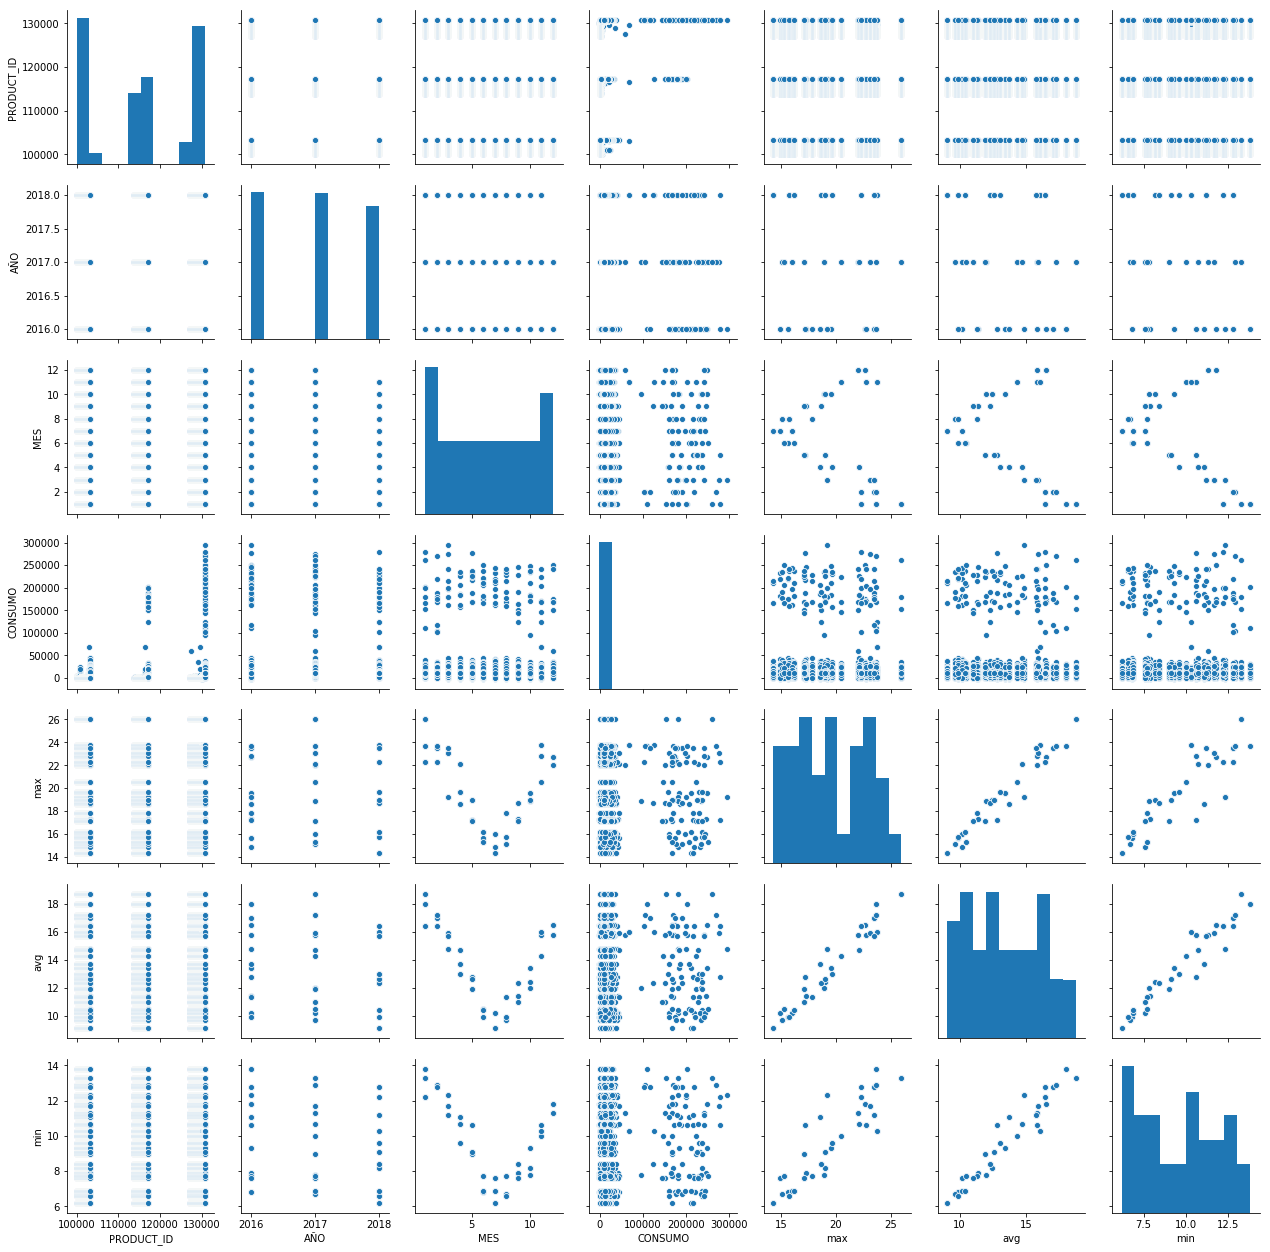

In [87]:
sns.pairplot(data)

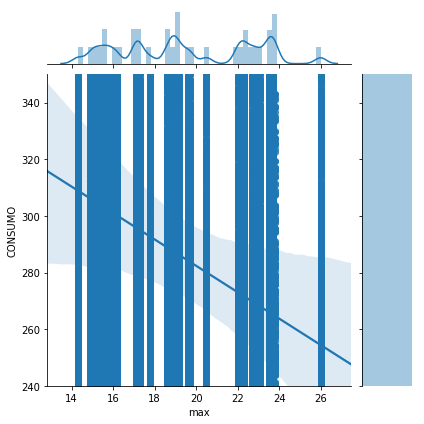

In [69]:
sns.jointplot(data = data, x= 'max', y ='CONSUMO' , kind="reg" , ylim=(240,350))   

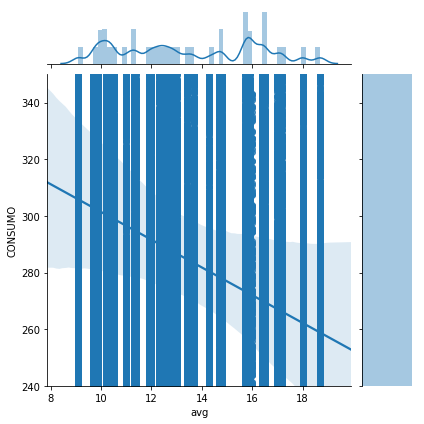

In [70]:
sns.jointplot(data = data, x= 'avg', y ='CONSUMO' , kind="reg" ,ylim=(240,350))   

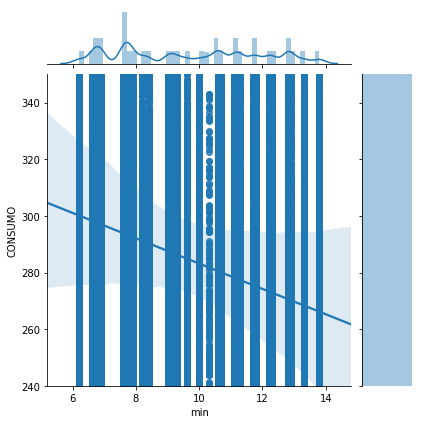

In [71]:
sns.jointplot(data = data, x= 'min', y ='CONSUMO', kind="reg", ylim=(240,350))   